## Melanoma Detection Assignment


- Name: Gautam Bhutani
- Email: bhutanigautam185@gmail.com
- Batch: C37
- Github : https://github.com/GautiBhutani/MelanomaDetectionAssignment (as it was mentioned by UPGRAD's Support team)

## Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers  import BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Importing Skin Cancer Data

In [ ]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Splitting the images into training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=10,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Splitting the images into validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=10,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

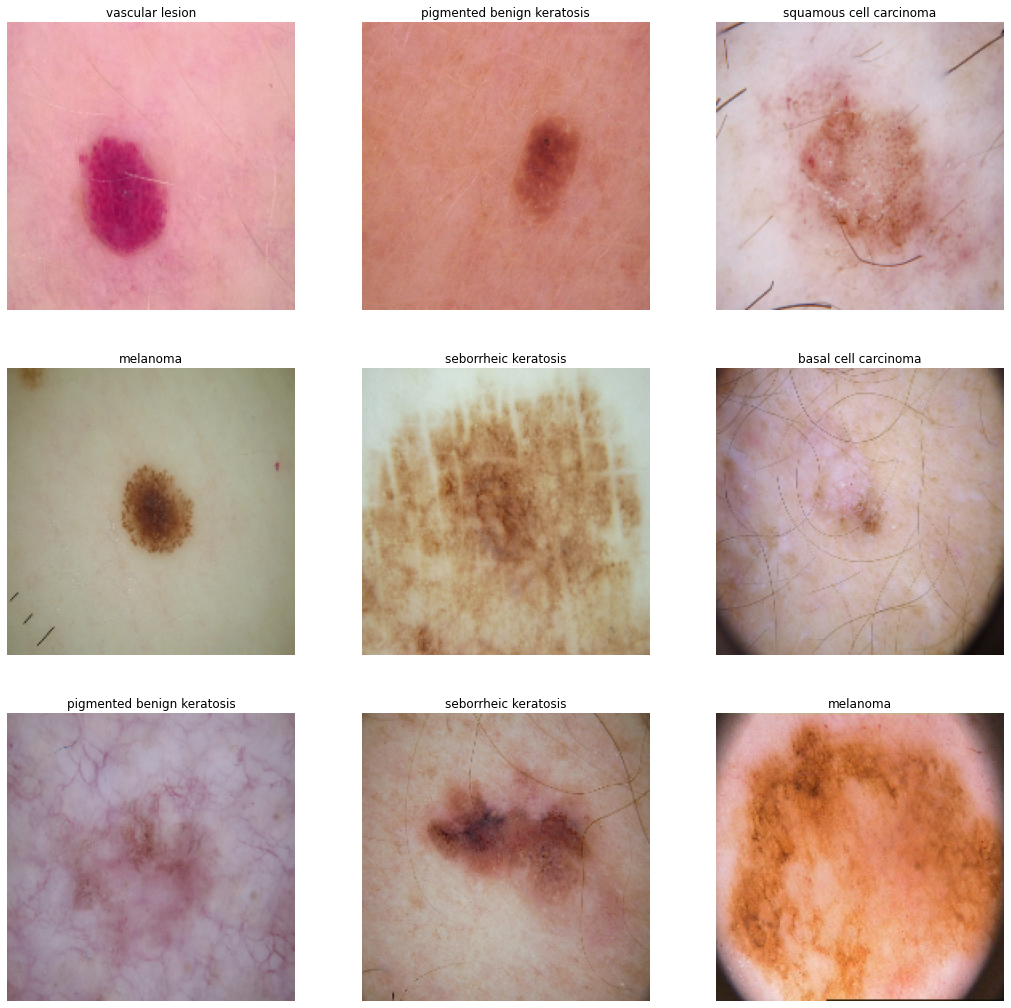

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(18, 18))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
####  Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Model 1
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

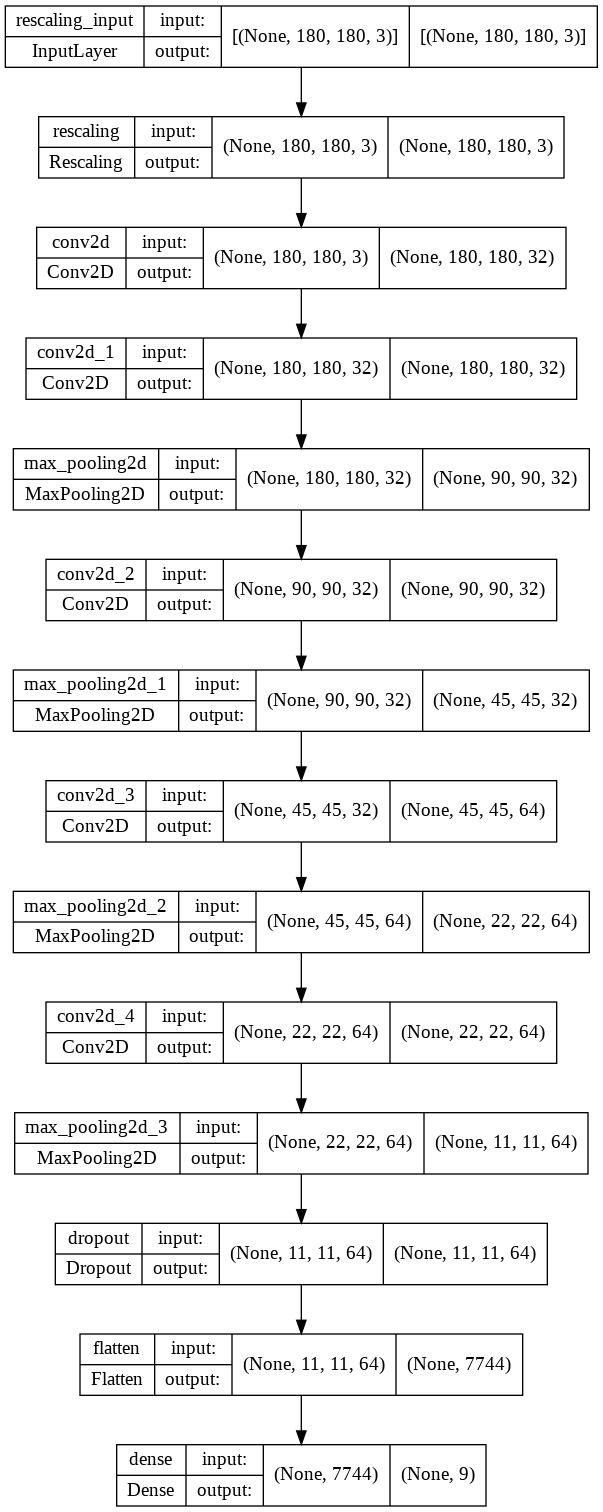

In [ ]:
# vizualizing the model 
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
###Model 1 compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [ ]:
#Training the model 1
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
epochs=epochs,callbacks=[earlystop]
)

Epoch 1/20
56/56 [==============================] - 6s 90ms/step - loss: 2.1331 - accuracy: 0.1992 - val_loss: 1.9272 - val_accuracy: 0.2796
Epoch 2/20
56/56 [==============================] - 5s 84ms/step - loss: 1.9152 - accuracy: 0.3108 - val_loss: 1.8829 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 5s 85ms/step - loss: 1.7546 - accuracy: 0.3756 - val_loss: 1.7472 - val_accuracy: 0.3445
Epoch 4/20
56/56 [==============================] - 5s 85ms/step - loss: 1.6449 - accuracy: 0.4146 - val_loss: 1.6440 - val_accuracy: 0.4049
Epoch 5/20
56/56 [==============================] - 5s 85ms/step - loss: 1.5337 - accuracy: 0.4576 - val_loss: 1.6077 - val_accuracy: 0.3960
Epoch 6/20
56/56 [==============================] - 5s 88ms/step - loss: 1.4991 - accuracy: 0.4827 - val_loss: 1.5417 - val_accuracy: 0.4474
Epoch 7/20
56/56 [==============================] - 5s 85ms/step - loss: 1.4564 - accuracy: 0.4955 - val_loss: 1.5737 - val_accuracy: 0.4474
Epoch 8/20
56

### Visualizing training results

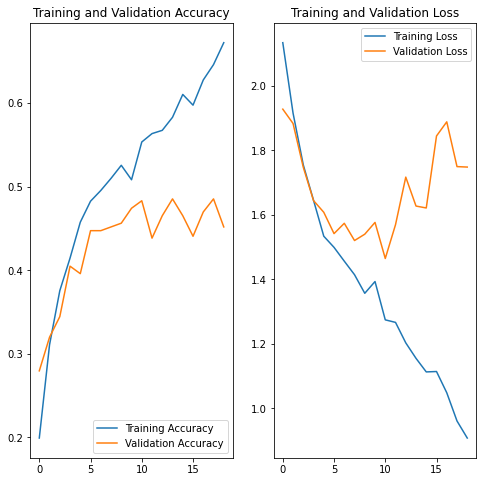

In [ ]:
# Visualizing the model 1 results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Model 1 evaluation metrics
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 0s 31ms/step - loss: 1.7478 - accuracy: 0.4519
Accuracy:  0.6953125
Validation Accuracy:  0.45190155506134033
Loss:  0.844353973865509
Validation Loss 1.7478363513946533


#### Findings after the model fit

#### Inference from Model 1:

As we can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 45% accuracy on the validation set.

Overfitting: In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy is only around 45% in the training process. This difference is a clear indicator of overfitting

### Model 2

In [ ]:
##Option1 

#After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


train_batches = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = class_names,
    batch_size = 32
 )

valid_batches = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = class_names,
    batch_size = 32
)


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
# After you have analysed the model fit history for presence of underfit or overfit, data augumentation strategy. 
#

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect'),
  ]
)

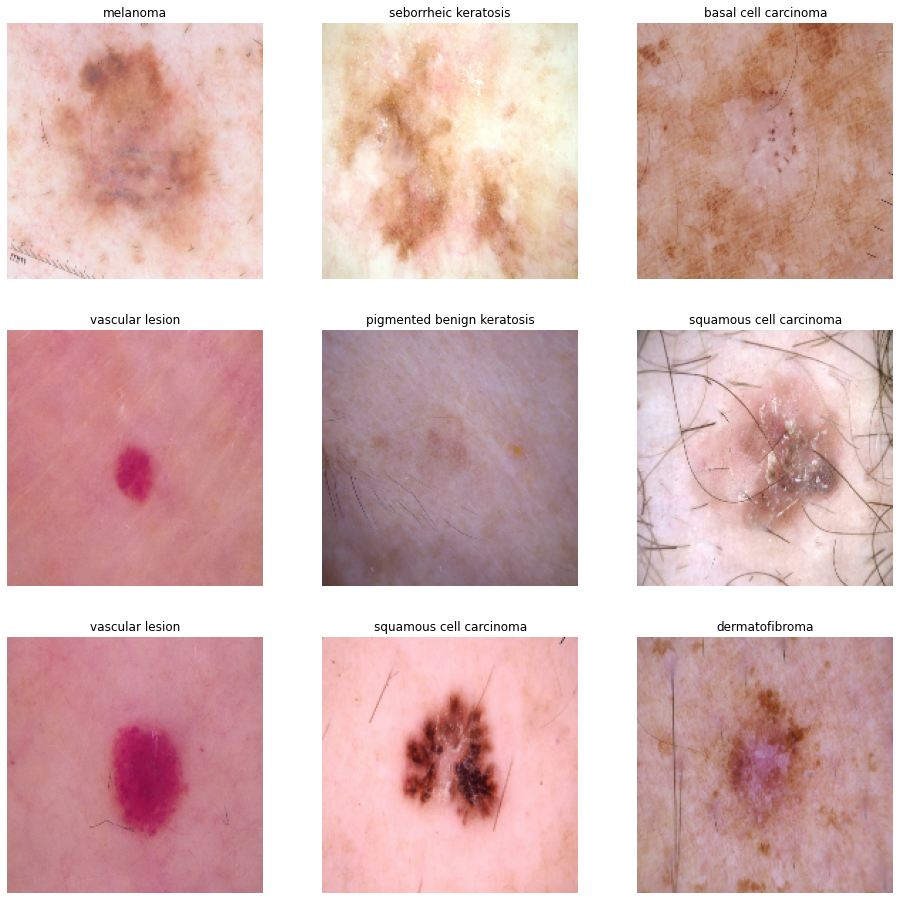

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(16, 16))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## Model 2 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [ ]:
## Compiling model 2
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Training Model 2 with 20 epochs 
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=[earlystop]
)

Epoch 1/20
56/56 [==============================] - 7s 91ms/step - loss: 2.0661 - accuracy: 0.1953 - val_loss: 1.9859 - val_accuracy: 0.3020
Epoch 2/20
56/56 [==============================] - 5s 87ms/step - loss: 1.9515 - accuracy: 0.2695 - val_loss: 1.8707 - val_accuracy: 0.2774
Epoch 3/20
56/56 [==============================] - 5s 87ms/step - loss: 1.7442 - accuracy: 0.3555 - val_loss: 1.7172 - val_accuracy: 0.3512
Epoch 4/20
56/56 [==============================] - 5s 88ms/step - loss: 1.6654 - accuracy: 0.3951 - val_loss: 1.6866 - val_accuracy: 0.3848
Epoch 5/20
56/56 [==============================] - 5s 88ms/step - loss: 1.6740 - accuracy: 0.4090 - val_loss: 1.9808 - val_accuracy: 0.3490
Epoch 6/20
56/56 [==============================] - 5s 88ms/step - loss: 1.5514 - accuracy: 0.4537 - val_loss: 1.6245 - val_accuracy: 0.4027
Epoch 7/20
56/56 [==============================] - 5s 87ms/step - loss: 1.5603 - accuracy: 0.4531 - val_loss: 1.5404 - val_accuracy: 0.4452
Epoch 8/20
56

### Visualizing the results

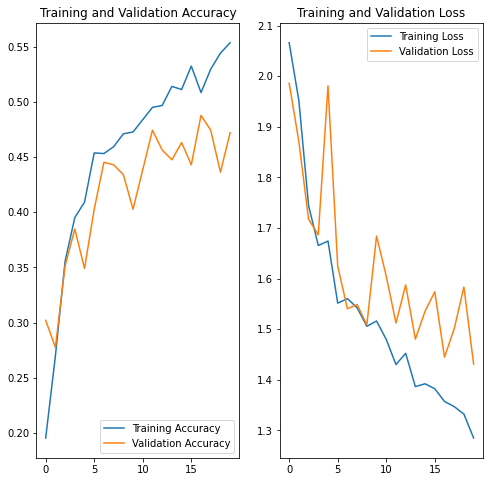

In [ ]:
#Visualizing the metrics for model 2
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [ ]:
#Evaluation of model 2
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)



14/14 [==============================] - 0s 31ms/step - loss: 1.4309 - accuracy: 0.4720
Accuracy:  0.5608258843421936
Validation Accuracy:  0.47203579545021057
Loss:  1.258261799812317
Validation Loss 1.4308974742889404


**Finding from Second Model**

- There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation 

- We can increase the data samples and add more layers to understand the complex structure.

## Model 3

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

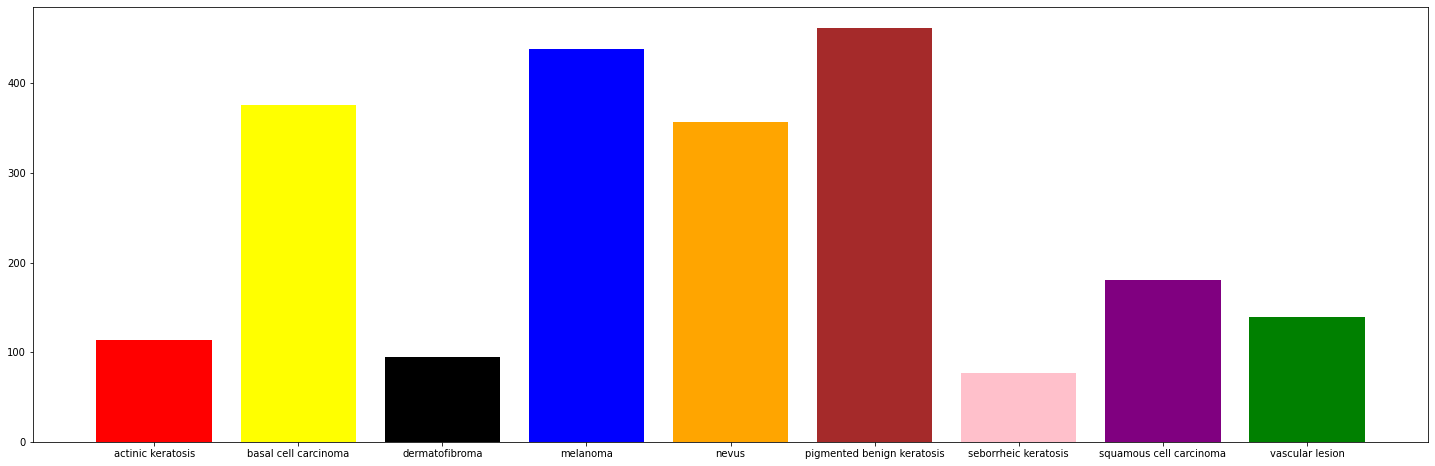

In [ ]:
## Visualizing the distribution of classes

count=[]
c = ['red', 'yellow', 'black', 'blue', 'orange','brown','pink','purple','green']
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,8))
plt.bar(class_names,count,color =c)

In [ ]:
#Count of each class
count

[114, 376, 95, 438, 357, 462, 77, 181, 139]

#### My findings here: 
#### - Which class has the least number of samples?
#### ---> **Seborrheic keraotosis** has the least number of samples i.e. 77.
#### - Which classes dominate the data in terms proportionate number of samples?
#### ---> **Pigmented benign keratosis** has the most number of samples i.e. 462.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
#Importing Augmentor and generating images to solve class imbalance
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A9AFDDA90>: 100%|██████████| 500/500 [00:23<00:00, 21.01 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4AA1F3EB50>: 100%|██████████| 500/500 [00:23<00:00, 21.43 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4AB60ABC90>: 100%|██████████| 500/500 [00:23<00:00, 21.27 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F4B20050490>: 100%|██████████| 500/500 [01:35<00:00,  5.22 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A9A96CBD0>: 100%|██████████| 500/500 [01:21<00:00,  6.10 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A9A926090>: 100%|██████████| 500/500 [00:19<00:00, 25.35 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4AA1C13750>: 100%|██████████| 500/500 [00:49<00:00, 10.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A9A909E90>: 100%|██████████| 500/500 [00:19<00:00, 25.67 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4A9AFCB590>: 100%|██████████| 500/500 [00:19<00:00, 25.40 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
count_images = len(list(data_dir_train.glob('*/output/*.jpg')))
print(count_images)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:5]

['gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025953.jpg_97bb3639-694e-412a-b1f0-2b0f27d0c505.jpg',
 'gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029141.jpg_71523664-ad16-4ded-8034-7dcbd636fc84.jpg',
 'gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029840.jpg_f93e2c58-6288-4763-b5b5-cfa1560dc21e.jpg',
 'gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031381.jpg_a81379c3-1075-4ee5-9379-9e2e0d0881c8.jpg',
 'gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027254.jpg_109204da-86ad-4543-a0bb-6235cd703d22.jpg']

In [ ]:
cancer_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
cancer_list[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [ ]:
balanced_df= pd.DataFrame(list(dict(zip(path_list, cancer_list)).items()),columns = ['Path','Label'])

In [ ]:
#Distribution of new added images 
balanced_df['Label'].value_counts()

actinic keratosis             500
seborrheic keratosis          500
vascular lesion               500
melanoma                      500
pigmented benign keratosis    500
squamous cell carcinoma       500
dermatofibroma                500
nevus                         500
basal cell carcinoma          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
#Setting parameters
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
#Creating the training dataset for Model 3
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=10,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
#Creating the validation dataset for Model 3
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=10,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## Model 3 containing BatchNormalization and dropOuts


model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = "softmax"))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_49 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_19 (Bat  (None, 90, 90, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 90, 90, 32)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
## Training Model 3 for 30 epochs
epochs = 30
history = model.fit(train_ds,
  epochs = epochs, verbose = 1, validation_data=val_ds)

Epoch 1/30
169/169 [==============================] - 16s 87ms/step - loss: 1.7146 - accuracy: 0.4034 - val_loss: 2.8229 - val_accuracy: 0.1329
Epoch 2/30
169/169 [==============================] - 15s 87ms/step - loss: 1.2017 - accuracy: 0.5786 - val_loss: 2.0820 - val_accuracy: 0.1856
Epoch 3/30
169/169 [==============================] - 15s 87ms/step - loss: 0.8790 - accuracy: 0.6944 - val_loss: 1.9114 - val_accuracy: 0.4068
Epoch 4/30
169/169 [==============================] - 15s 86ms/step - loss: 0.5619 - accuracy: 0.8116 - val_loss: 1.1004 - val_accuracy: 0.6095
Epoch 5/30
169/169 [==============================] - 15s 86ms/step - loss: 0.3412 - accuracy: 0.8926 - val_loss: 1.1514 - val_accuracy: 0.5872
Epoch 6/30
169/169 [==============================] - 15s 86ms/step - loss: 0.2451 - accuracy: 0.9219 - val_loss: 0.8493 - val_accuracy: 0.7305
Epoch 7/30
169/169 [==============================] - 15s 86ms/step - loss: 0.1613 - accuracy: 0.9473 - val_loss: 0.9938 - val_accuracy:

#### **Todo:**  Visualize the model results

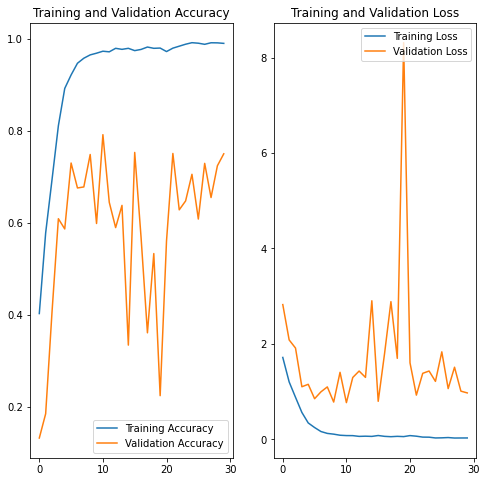

In [ ]:
#Visualizating the model 3 results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
#Evaluation metrics
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)



43/43 [==============================] - 1s 20ms/step - loss: 0.9711 - accuracy: 0.7506
Accuracy:  0.9421365261077881
Validation Accuracy:  0.7505567669868469
Loss:  0.184316948056221
Validation Loss 0.9710515737533569


#### Findings from third model

- Accuracy on training data has increased by using Augmentor library but not much on the validation dataset .
- Although Class rebalance has helped after having more data examples for training.

- Model is still a little overfitting
